# Heatmapping the VGG16 Picasso Model

This notebook requires:
* python==3.6
* innvestigate
* keras==2.2.4
* tensorflow==1.17

The keras and tensorflow versions are required by innvestiagte and implemented in the keras-direct-import branch of this project.

In [1]:
%matplotlib inline  
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import cv2

import keras
import os

import warnings
warnings.simplefilter('ignore')

Using TensorFlow backend.
/Users/lennart/opt/anaconda3/envs/py36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/lennart/opt/anaconda3/envs/py36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/lennart/opt/anaconda3/envs/py36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/l

In [2]:
import innvestigate
import innvestigate.utils as iutils

In [3]:
import numpy as np

In [4]:
from data_loaders.picasso_loader import PicassoLoader

## Loading the trained model

Keras 2.2.4 has a bug while trying to load a model. Just loading the model as `model = keras.models.load_model('output/models/vgg.model')` results in a `ValueError: You are trying to load a weight file containing 14 layers into a model with 0 layers`

Instead I have to construct the model and load only the weights.


### Sources
* https://stackoverflow.com/questions/53993348/valueerror-you-are-trying-to-load-a-weight-file-containing-6-layers-into-a-mode
* https://github.com/keras-team/keras/issues/10417

In [5]:
from models.vgg import VGGFinetune

vgg = VGGFinetune() # this tries to load the model and therefore throws the error describe above, but as this fails
# it creates a new, blank model

You are trying to load a weight file containing 14 layers into a model with 0 layers
[*] Compiling model


For the branch with the keras and tensorflow version used here, I could change up loading the model to reconstruing it and then only load the weights, as load_model will never work and it wont allow to continune training for more than one epoch.

In [6]:
model = vgg.model
model.load_weights('output/models/vgg.model')

In [7]:
training, validation, test, info = PicassoLoader().get_data_flows()

[+] Got training examples:
Found 9002 images belonging to 2 classes.
[+] Got validation examples:
Found 1046 images belonging to 2 classes.
[+] Got test examples:
Found 1046 images belonging to 2 classes.


In [8]:
# The flow / generator gives a batch of 32 images each time
x_batch, y_batch = test.next()

In [9]:
img01 = x_batch[0]

In [10]:
# This is the actual label
y_batch[0]

0.0

In [11]:
# This a prediction for the example
# As we only use one example, but the model expects an array, we have to expand the dimensions of the input with np
model.predict(np.expand_dims(img01, axis=0))

array([[3.8313266e-17]], dtype=float32)

In [12]:
predictions = model.predict(x_batch)

for index, actual_label in enumerate(y_batch):
    print(f'True label: {actual_label}, predicted label: {predictions[index]}')

True label: 0.0, predicted label: [3.8313266e-17]
True label: 0.0, predicted label: [1.6327523e-33]
True label: 0.0, predicted label: [3.726024e-08]
True label: 0.0, predicted label: [4.954121e-15]
True label: 1.0, predicted label: [1.]
True label: 1.0, predicted label: [1.]
True label: 0.0, predicted label: [4.1311337e-16]
True label: 0.0, predicted label: [4.471359e-22]
True label: 1.0, predicted label: [0.9999857]
True label: 0.0, predicted label: [0.00011374]
True label: 1.0, predicted label: [0.9999924]
True label: 1.0, predicted label: [0.9999993]
True label: 1.0, predicted label: [1.]
True label: 1.0, predicted label: [1.]
True label: 1.0, predicted label: [0.9999883]
True label: 1.0, predicted label: [1.]
True label: 1.0, predicted label: [0.9999994]
True label: 0.0, predicted label: [0.]
True label: 0.0, predicted label: [1.9327046e-30]
True label: 0.0, predicted label: [3.0461557e-22]
True label: 0.0, predicted label: [0.15525614]
True label: 0.0, predicted label: [0.]
True l

## Plot some of the inputs

This project uses the keras image generators and the vgg16 preprocessing, so the images are BRG instead of RGB and require some attention before being plotted.

In [13]:
# taken from https://expoundai.wordpress.com/2019/04/24/image-data-generators-in-keras/
def show_grid(image_list,nrows,ncols,label_list=None,show_labels=False,savename=None,figsize=(10,10),showaxis='off'):
    if type(image_list) is not list:
        if(image_list.shape[-1]==1):
            image_list = [image_list[i,:,:,0] for i in range(image_list.shape[0])]
        elif(image_list.shape[-1]==3):
            image_list = [image_list[i,:,:,:] for i in range(image_list.shape[0])]
    fig = plt.figure(None, figsize,frameon=False)
    grid = ImageGrid(fig, 111,  # similar to subplot(111)
                     nrows_ncols=(nrows, ncols),  # creates 2x2 grid of axes
                     axes_pad=0.3,  # pad between axes in inch.
                     share_all=True,
                     )
    for i in range(nrows*ncols):
        ax = grid[i]
        ax.imshow(image_list[i],cmap='Greys_r')  # The AxesGrid object work as a list of axes.
        ax.axis('off')
        #if show_labels:
            #ax.set_title(class_mapping[y_int[i]])
    if savename != None:
        plt.savefig(savename,bbox_inches='tight')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

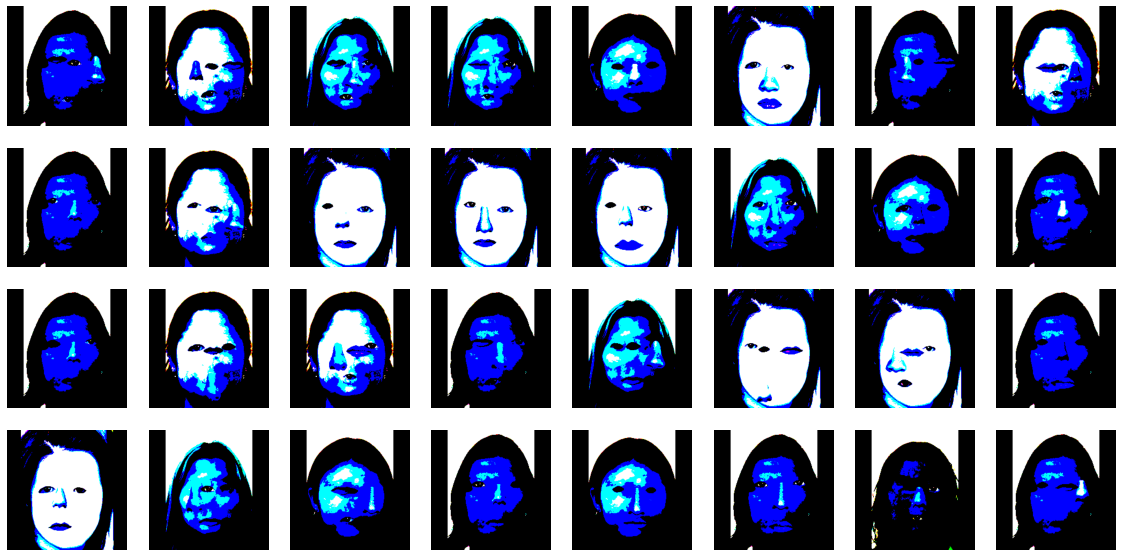

In [14]:
show_grid(x_batch,4,8,label_list=y_batch,show_labels=True,figsize=(20,10),savename=None)

In [15]:
im_rgb = cv2.cvtColor(img01, cv2.COLOR_BGR2RGB)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


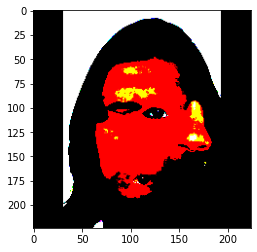

In [16]:
plt.imshow(im_rgb)

## Analyzing the models descision
Heatmap the networks activation to see which parts of the input were relevant to the networks output

In [17]:
def show_analysis(analyser, n_samples, n_cols=6, figsize=(10,10)):
    
    n_rows = int(n_samples / n_cols)
    
    # Set up the figure & grid
    fig = plt.figure(None, figsize,frameon=False)
    grid = ImageGrid(fig, 111,  # similar to subplot(111)
                         nrows_ncols=(n_rows, n_cols), 
                         axes_pad=0.5,  # pad between axes in inch.
                         share_all=True,
                         )
    for i in range(n_samples):
        
        a = analyser.analyze(np.expand_dims(x_batch[i], axis=0))
        
        # Aggregate along color channels and normalize to [-1, 1]
        # This is done following the innvestigate documentation
        a = a.sum(axis=np.argmax(np.asarray(a.shape) == 3))
        a /= np.max(np.abs(a))
        
        ax = grid[i]
        ax.imshow(a[0], clim=(-1, 1), cmap='seismic')  # The AxesGrid object work as a list of axes.
        ax.axis('off')
        
        # Show the labels
        ax.set_title(f'label: {y_batch[i]}, pred: {round(predictions[i][0])}', fontsize=22)
        

### Deep Taylor

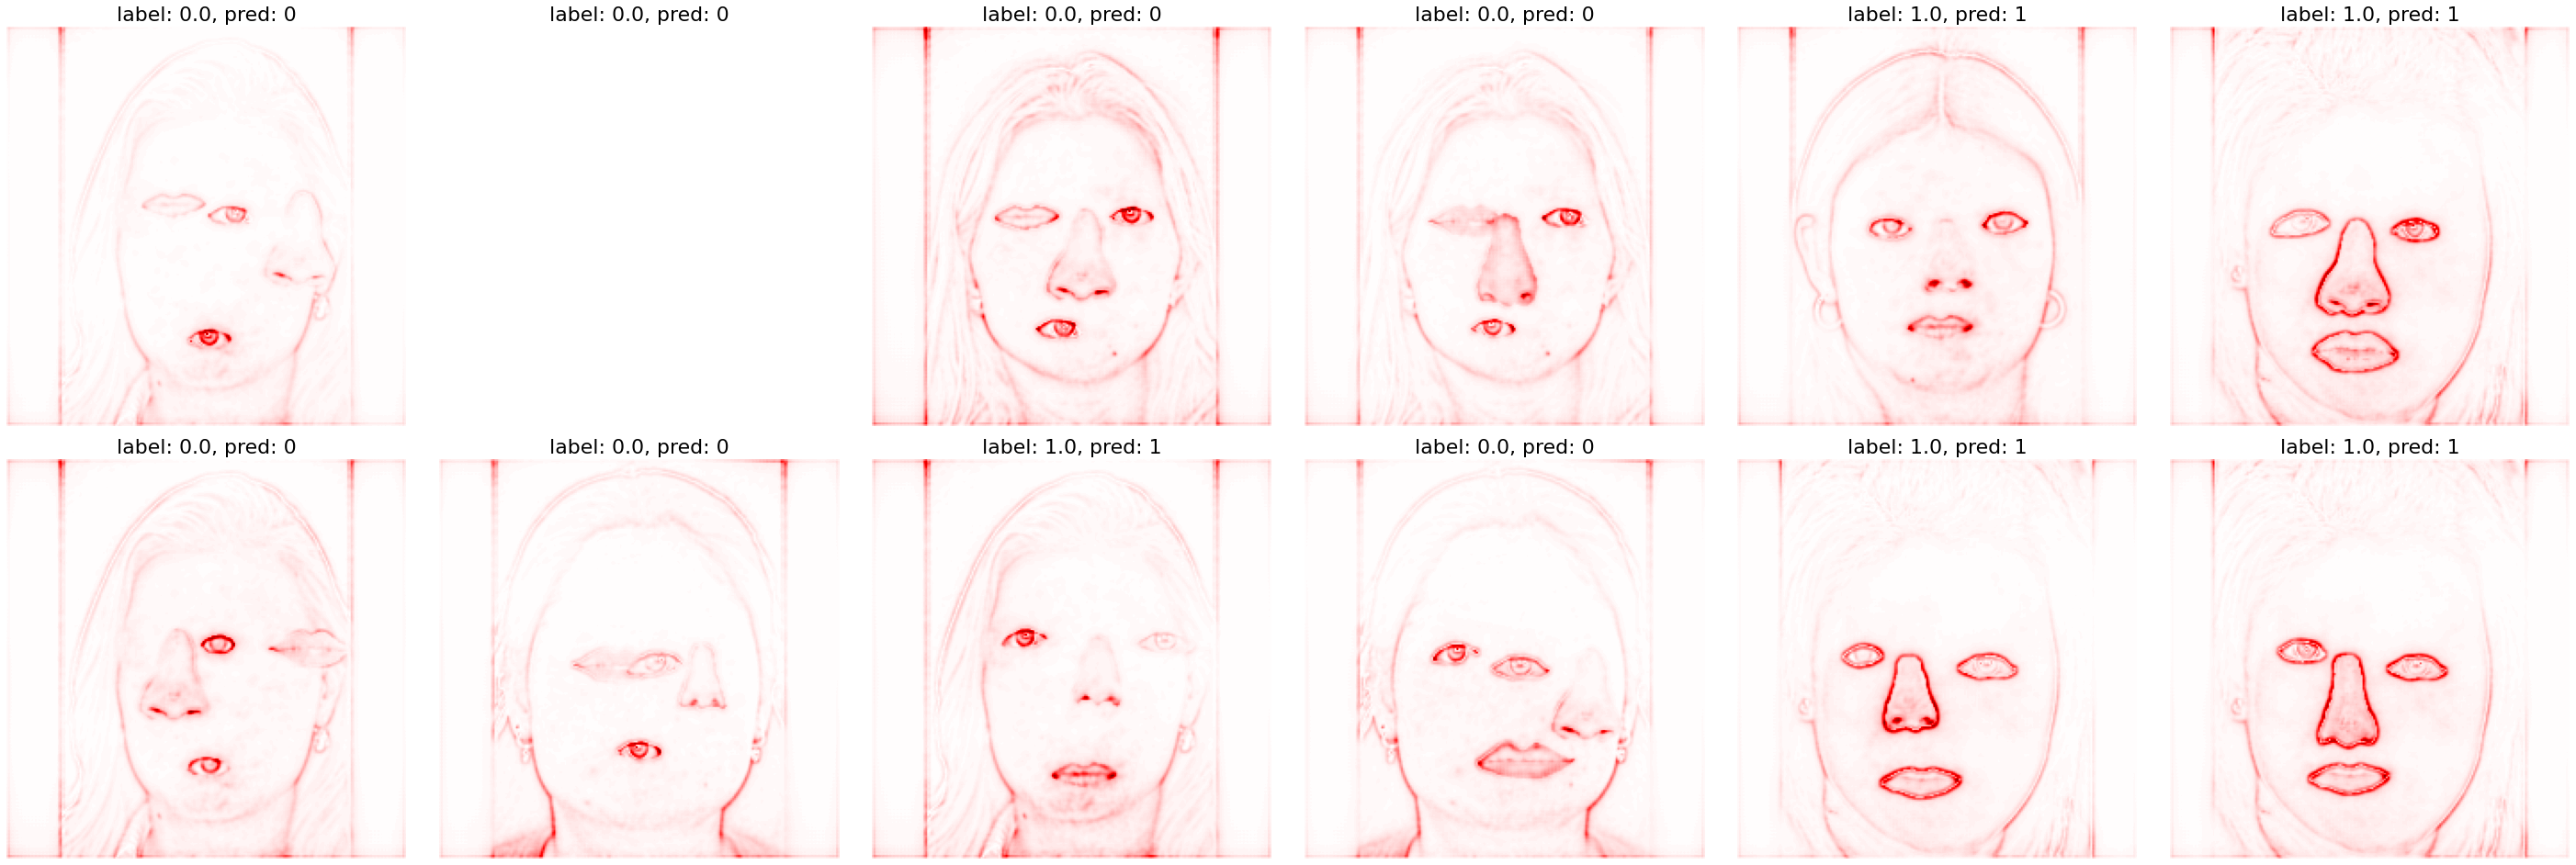

In [18]:
dt_analyser = innvestigate.create_analyzer("deep_taylor", model)
show_analysis(dt_analyser, 12, 6, (50,50))

The output of the innvestiagte analyser is two-dimensional (at least for deep_taylor).

### Layerwise Relevance Propagation
* Lapuschkin 2019: Opening the Machine Learning Black Box with Layer-wise Relevance Propagation
* https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0130140

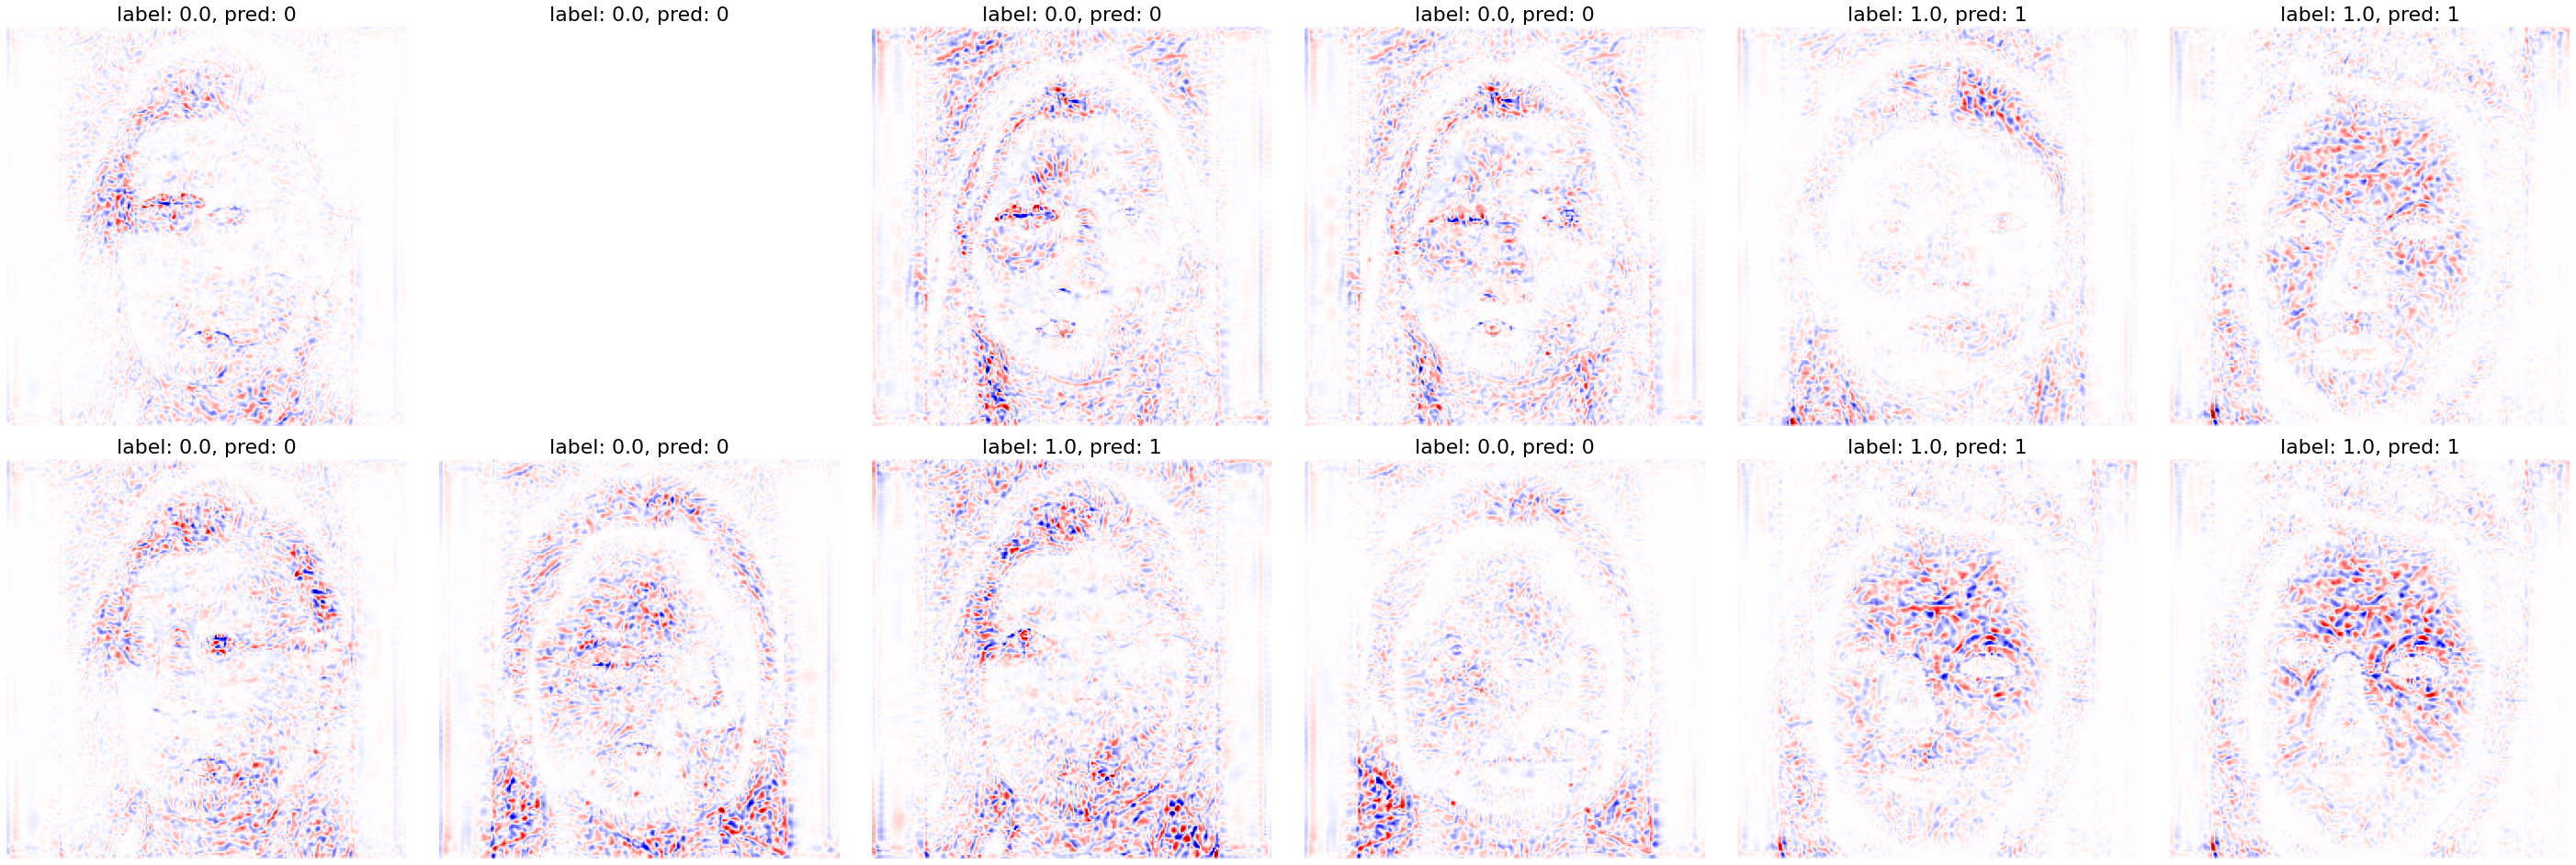

In [19]:
# LRP Z
lrpz_analyser = innvestigate.create_analyzer("lrp.z", model)
show_analysis(lrpz_analyser, 12, 6, (50,50))

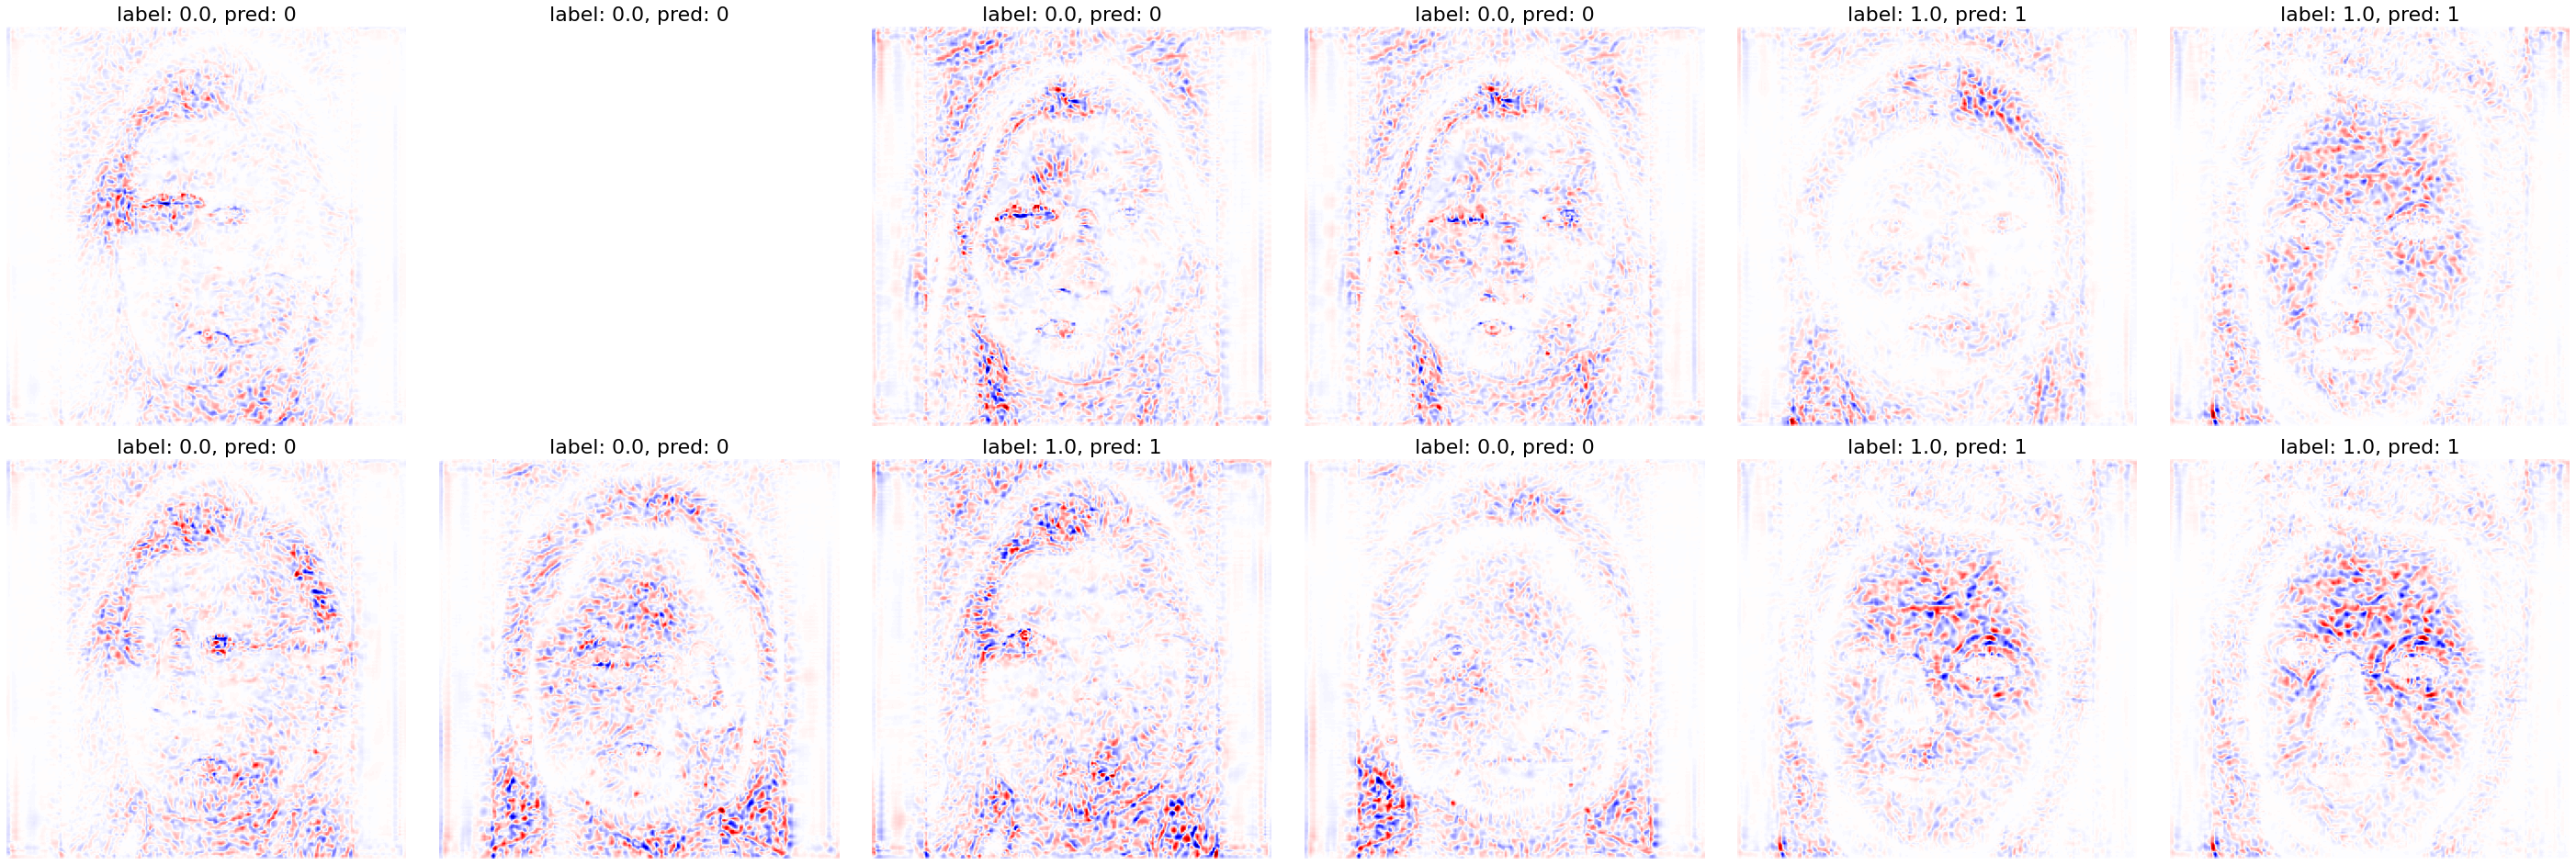

In [20]:
# LRP EPSILON
lrpep_analyser = innvestigate.create_analyzer("lrp.epsilon", model)
show_analysis(lrpep_analyser, 12, 6, (50,50))

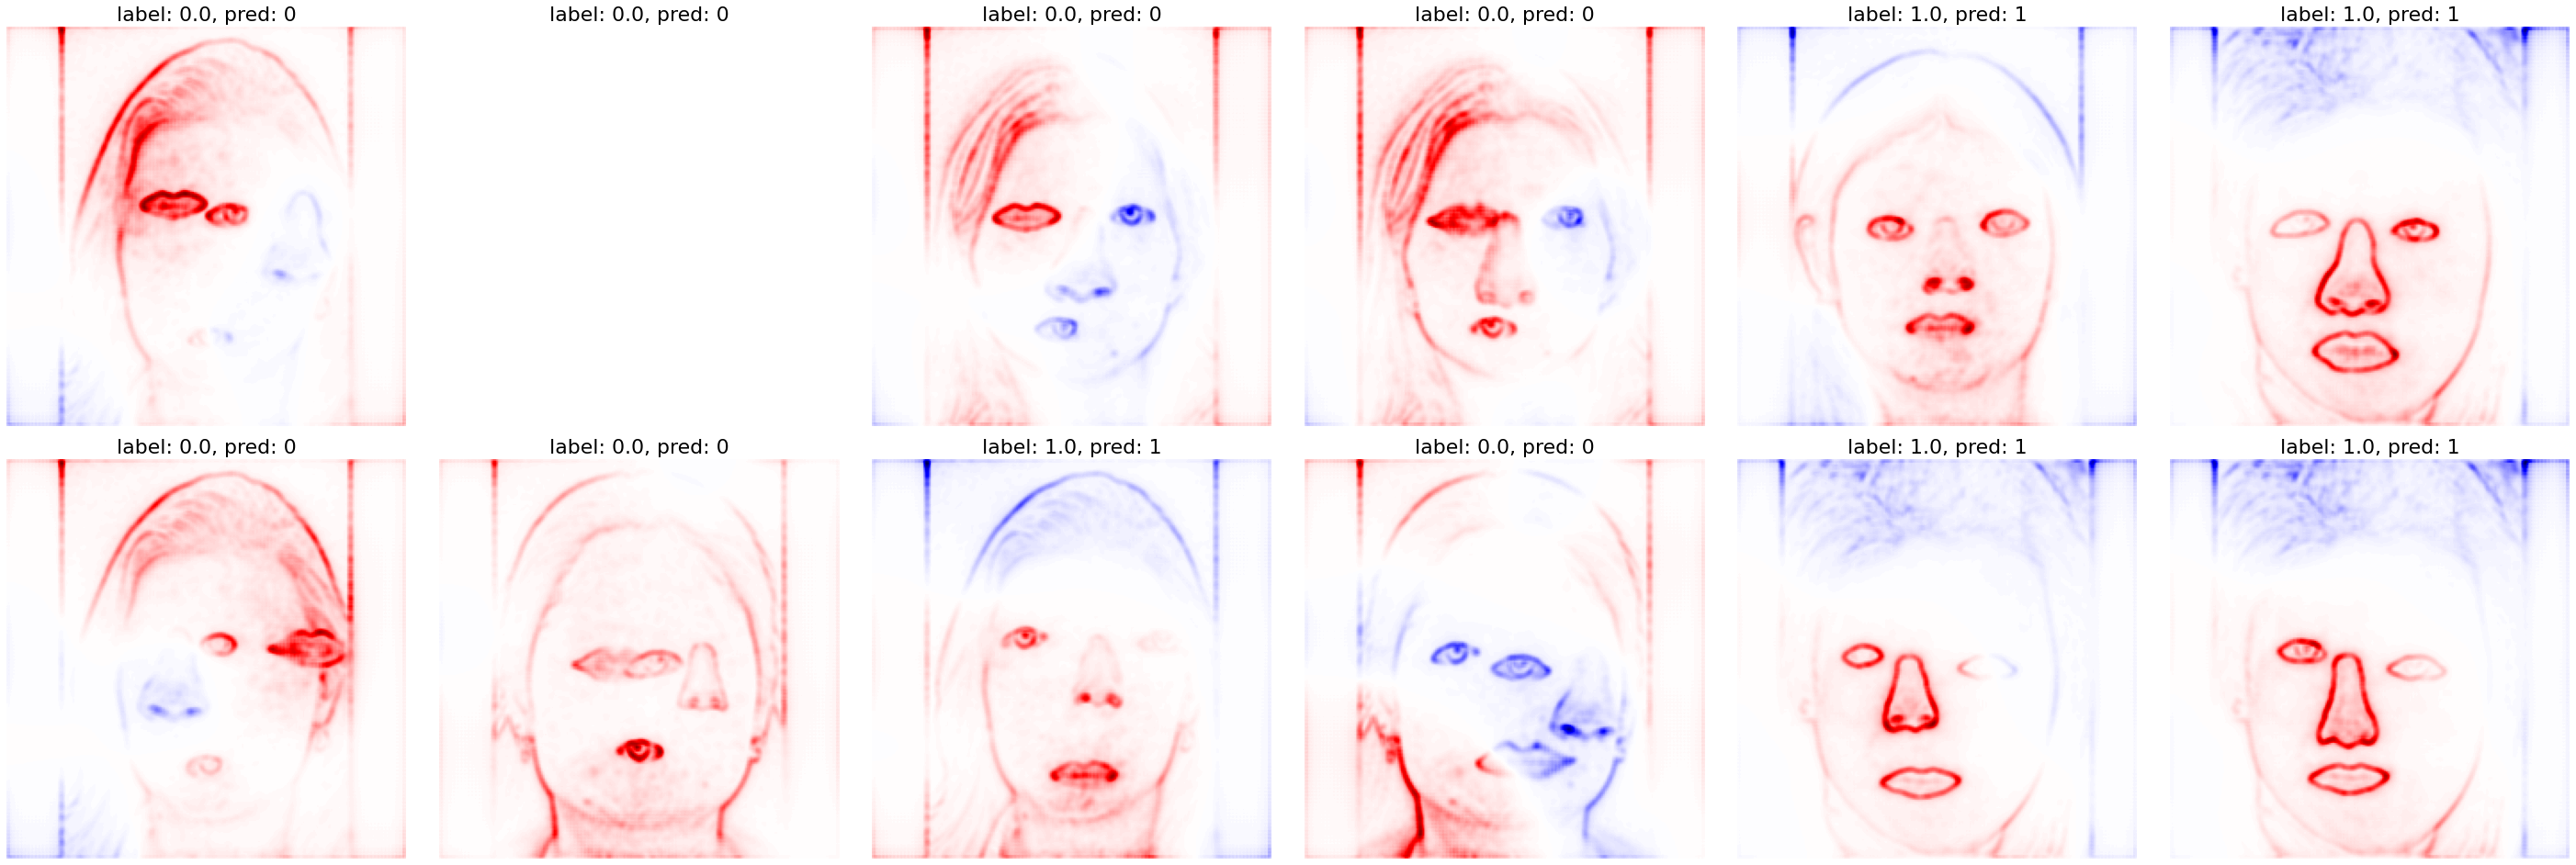

In [21]:
# LRP Preset A Flat
lrpaf_analyser = innvestigate.create_analyzer("lrp.sequential_preset_a_flat", model)
show_analysis(lrpaf_analyser, 12, 6, (50,50))

### Guided Backprop

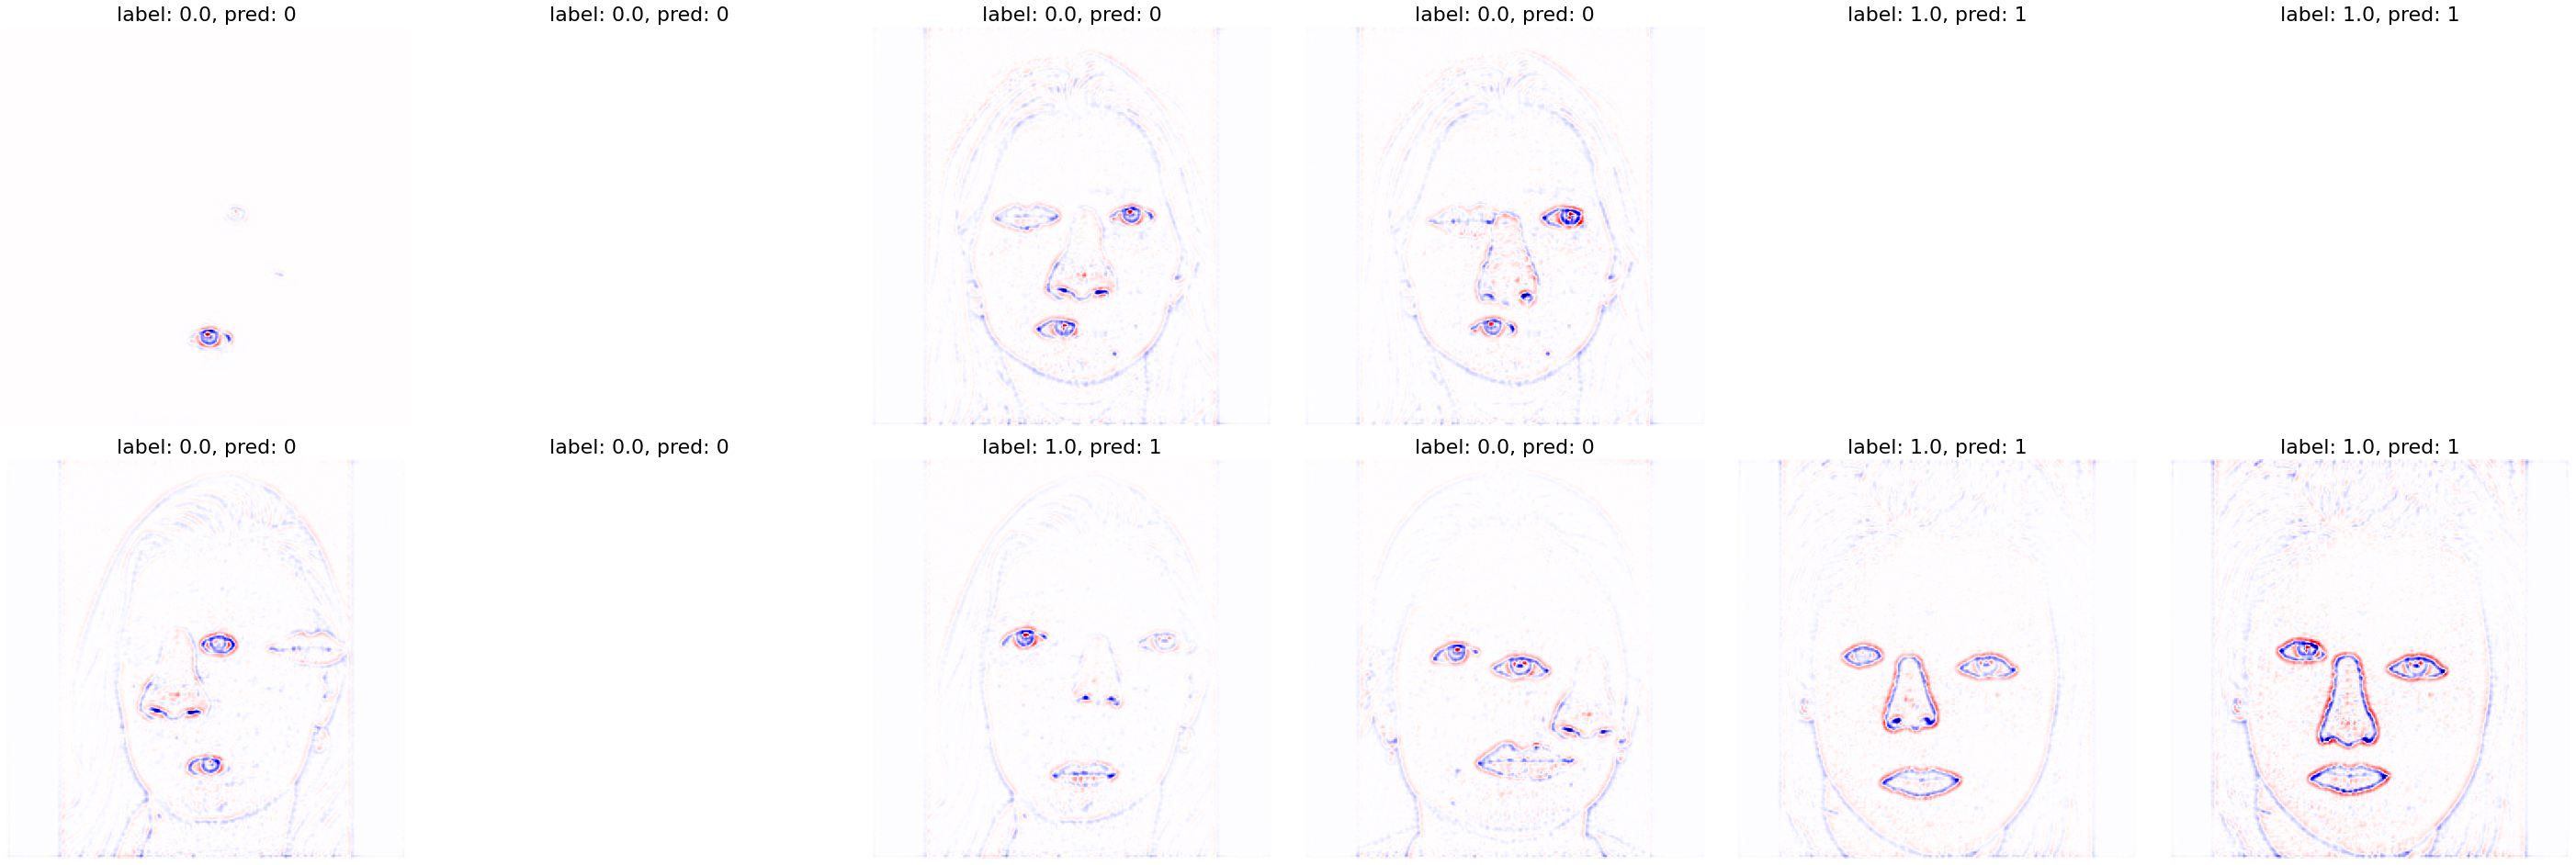

In [22]:
gb_analyser = innvestigate.create_analyzer("guided_backprop", model)
show_analysis(gb_analyser, 12, 6, (50,50))

The output is already strongly segmented, maybe I could start annotation at this point?
https://lionbridge.ai/articles/image-annotation-tools-for-computer-vision/

## Segmentation / Clustering
 

* https://towardsdatascience.com/cluster-based-image-segmentation-python-80a295f4f3a2
* https://towardsdatascience.com/image-segmentation-using-pythons-scikit-image-module-533a61ecc980 
* https://stackoverflow.com/questions/31877353/overlay-an-image-segmentation-with-numpy-and-matplotlib


In [23]:
def image_show(image, nrows=1, ncols=1, cmap='gray'):
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 14))
    ax.imshow(image, cmap="seismic", clim=(-1, 1))
    ax.axis('off')
    return fig, ax

In [24]:
image_2D = a[0]
# Use KMeans clustering algorithm from sklearn.cluster to cluster pixels in image
from sklearn.cluster import KMeans
# tweak the cluster size and see what happens to the Output
kmeans = KMeans(n_clusters=50, random_state=0).fit(image_2D)
clustered = kmeans.cluster_centers_[kmeans.labels_]

plt.imshow(img01, cmap='BrBG') # interpolation='none'
plt.imshow(clustered, cmap='seismic', alpha=0.9)
image_show(clustered)

NameError: name 'a' is not defined

In [ ]:
import skimage.segmentation as seg
import skimage.color as color

img_bw = color.rgb2gray(a)
image_slic = seg.slic(img_bw, n_segments=200, compactness=0.1, enforce_connectivity=True, multichannel=False)

In [ ]:
image_show(image_slic)